In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [21]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash-lite-preview-06-17",
    api_key = os.environ["GEMINI_API_KEY"]
)

In [22]:
class BlogState(TypedDict):
    topic: str
    outline: str
    content: str
    evaluate: float

In [23]:
def generate_outline(state: BlogState) -> BlogState:
    """Generate an outline for a blog using LLM"""
    topic = state["topic"]
    prompt = f"generate a detailed outline for a blog on given topic: {topic}"
    outline = llm.invoke(prompt).content
    state["outline"] = outline
    return state

In [24]:
def generate_blog(state: BlogState) -> BlogState:
    """Generate a blog using above generated outline"""
    topic = state['topic']
    outline = state['outline']
    prompt = f"writa a deaitled blog on given topic: {topic} using the following outline: \n{outline}"
    state['content'] = llm.invoke(prompt).content
    return state

In [ ]:
def evaluate_blog(state: BlogState) -> BlogState:
    """Evaluate blog based on outline"""
    outline = state["outline"]
    content = state["content"]
    prompt = f"Evalaute genrated blog based on generated outline: {outline} \n and here's generated blog content: {content} and give me score out of 10"
    state["evaluate"] = llm.invoke(prompt).content
    return state

In [26]:
graph = StateGraph(BlogState)
graph.add_node("generate_outline", generate_outline)
graph.add_node("generate_blog", generate_blog)
graph.add_node("evaluate_blog", evaluate_blog)
graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_blog")
graph.add_edge("generate_blog", "evaluate_blog")
graph.add_edge("evaluate_blog", END)

workflow = graph.compile()

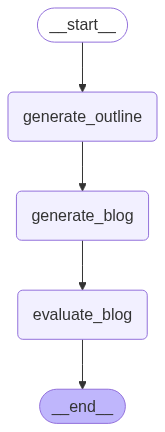

In [27]:
from IPython.display import Image, display
display(Image(workflow.get_graph().draw_mermaid_png()))

In [28]:
result = workflow.invoke({'topic': "The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips : Axos"})

In [29]:
result

{'topic': 'The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips : Axos',
 'outline': '## Blog Outline: The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips (Axos)\n\n**Target Audience:** Linux enthusiasts, aspiring Linux users, tech-savvy individuals looking for deeper control and personalization.\n\n**Goal:** To highlight the unparalleled customization potential of Linux, using Axos as a specific, yet illustrative, example of this philosophy. To inspire readers to explore Linux and its customizability.\n\n---\n\n**Blog Title:** The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips (Axos)\n\n**Meta Description:** Discover the liberating power of Linux customization. Explore how distributions like Axos empower you to craft a truly unique and efficient desktop experience.\n\n---\n\n**I. Introduction: The Allure of a Personalized Digital World**\n\n*   **A. Hook:**\n    *   Start with a relatable pain point of proprietary op

In [30]:
print(result["outline"])

## Blog Outline: The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips (Axos)

**Target Audience:** Linux enthusiasts, aspiring Linux users, tech-savvy individuals looking for deeper control and personalization.

**Goal:** To highlight the unparalleled customization potential of Linux, using Axos as a specific, yet illustrative, example of this philosophy. To inspire readers to explore Linux and its customizability.

---

**Blog Title:** The Ultimate Linux Experience – Unrivaled Customization at Your Fingertips (Axos)

**Meta Description:** Discover the liberating power of Linux customization. Explore how distributions like Axos empower you to craft a truly unique and efficient desktop experience.

---

**I. Introduction: The Allure of a Personalized Digital World**

*   **A. Hook:**
    *   Start with a relatable pain point of proprietary operating systems (e.g., rigid interfaces, limited control, forced updates, bloatware).
    *   Paint a picture of a digital en

In [31]:
with open("blog.txt", "w") as f:
    f.write(result["content"])

In [33]:
print(result["evaluate"].content)

Here's an evaluation of the generated blog content based on the provided outline, along with a score:

## Evaluation of Generated Blog Content

**Overall Score: 9/10**

The generated blog content is a strong and faithful execution of the provided outline. It effectively captures the spirit and intent of each section, delivering a comprehensive and engaging piece that targets the intended audience.

Here's a breakdown of its strengths and areas for minor improvement:

**Strengths:**

*   **Adherence to Outline:** The content meticulously follows the structure and points laid out in the outline. Each section and subsection is addressed, ensuring a logical flow and comprehensive coverage of the topic.
*   **Target Audience Focus:** The language and tone are well-suited for Linux enthusiasts and aspiring users. It avoids overly technical jargon where unnecessary but doesn't shy away from introducing key concepts like kernels, DEs, and WMs. The emphasis on "user control," "freedom," and "pe